Machine Learning project for Python Class: A neural network distinguishing cats and dogs
Creators: Michał Kloska, Jakub Zapaśnik, Daniel Lilla

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras

from sklearn.model_selection import train_test_split

In [2]:
from keras.preprocessing.image import load_img, img_to_array, image

In [3]:
#loading file names
import os

img_dir = r'C:\Users\Miszel\Desktop\train'
images = os.listdir(img_dir)
images[:3]

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg']

In [4]:
full_images = [os.path.join(img_dir, img) for img in images]

In [5]:
full_images[:3]

['C:\\Users\\Miszel\\Desktop\\train\\cat.0.jpg',
 'C:\\Users\\Miszel\\Desktop\\train\\cat.1.jpg',
 'C:\\Users\\Miszel\\Desktop\\train\\cat.10.jpg']

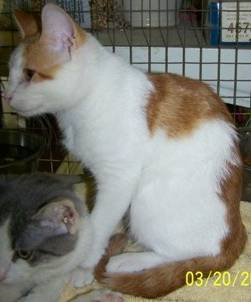

In [6]:
image_index = 6482
load_img(full_images[image_index])

In [7]:
#creating RGB layers for the model to detect colours
def show_rgb_layers(image, subplots_args=dict()):
    '''
    Show RGB layers of the image on separate axes.
    '''
    
    im_shape = image.shape
    
#     check if the loaded image has 3 dimensions
    assert image.ndim == 3
#     check whether the last dimension of im_shape has 3 dimensions
    assert im_shape[-1] == 3
    
#     plot rgb layers
    fig, ax = plt.subplots(ncols=3)
    for idx, layer in enumerate(['Reds', 'Greens', 'Blues']):
        ax[idx].imshow(image[:, :, idx], cmap=layer)
    
    return fig

In [8]:
from imports_for_ML import load_images

x, y = load_images(img_dir, n_images=20000, resize=(100, 100))

**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
*******************************

In [50]:
x.shape

(20000, 100, 100, 3)

In [9]:
from keras.models import Sequential
from keras.layers import Dense

from keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

from keras.callbacks import EarlyStopping

from keras.models import load_model

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state=42)

In [52]:
x_train.shape

(18000, 100, 100, 3)

In [53]:
x_test.shape

(2000, 100, 100, 3)

In [63]:
model = Sequential([
#first convolution layer, then max pooling
Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform'),
MaxPooling2D((3,3)),
BatchNormalization(),
Dropout(0.25),
#next convolution layer, then max pooling
Conv2D(64,(3,3), activation = 'relu', kernel_initializer='he_uniform'),
MaxPooling2D((2,2)),
BatchNormalization(),
Dropout(0.25),
#last convolution layer, then maxpooling
Conv2D(128, (3,3), activation = 'relu', kernel_initializer='he_uniform'),
MaxPooling2D((2,2)),
BatchNormalization(),
Dropout(0.25),

#flattening and adding 128 ordinary neurons
Flatten(),
Dense(128, activation = 'relu'),
Dropout(0.5),

#last binary neuron outputting 1 or 0; dog or cat
Dense(1, activation='sigmoid')

])
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [64]:
stop_early = EarlyStopping(patience = 4)
history = model.fit(x_train, y_train, epochs = 30, validation_split= 0.04, callbacks=[stop_early])

Epoch 1/30
540/540 [==============================] - 53s 98ms/step - loss: 0.8176 - accuracy: 0.6511 - val_loss: 0.6024 - val_accuracy: 0.7139
Epoch 2/30
540/540 [==============================] - 51s 95ms/step - loss: 0.5133 - accuracy: 0.7499 - val_loss: 0.5079 - val_accuracy: 0.7569
Epoch 3/30
540/540 [==============================] - 52s 96ms/step - loss: 0.4609 - accuracy: 0.7837 - val_loss: 0.4586 - val_accuracy: 0.7833
Epoch 4/30
540/540 [==============================] - 51s 94ms/step - loss: 0.4206 - accuracy: 0.8078 - val_loss: 0.6767 - val_accuracy: 0.7583
Epoch 5/30
540/540 [==============================] - 51s 95ms/step - loss: 0.3875 - accuracy: 0.8278 - val_loss: 0.6930 - val_accuracy: 0.7097
Epoch 6/30
540/540 [==============================] - 51s 95ms/step - loss: 0.3649 - accuracy: 0.8398 - val_loss: 0.4326 - val_accuracy: 0.7958
Epoch 7/30
540/540 [==============================] - 53s 98ms/step - loss: 0.3349 - accuracy: 0.8530 - val_loss: 0.4197 - val_accuracy:

In [65]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_15 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_20 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 15, 15, 64)      

In [66]:
keras.models.save_model(model = model, filepath = r'G:\My Drive\My Uni\Koźmin\Semester_2\Intro_python\Python_Proj\ML_Python_Proj\Michal_Kloska_46341_model', save_format = "h5")

In [12]:
model = keras.models.load_model(r'G:\My Drive\My Uni\Koźmin\Semester_2\Intro_python\Python_Proj\ML_Python_Proj\Michal_Kloska_46341_model')

In [133]:
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], 'o', label='validation')
plt.ylabel('Accuracy')
plt.legend()

NameError: name 'history' is not defined

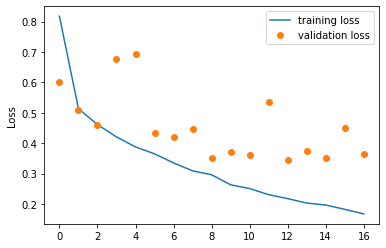

In [68]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], 'o', label = 'validation loss')
plt.ylabel('Loss')
plt.legend()

In [134]:
train_corr = model.fit(x_train, y_train)

test_corr = model.fit(x_test, y_test)

63/63 [==============================] - 6s 91ms/step - loss: 0.2326 - accuracy: 0.9110


Accuracy on the training data:
563/563 [==============================] - 12s 22ms/step - loss: 0.2183 - accuracy: 0.9269
0.9269444346427917

Accuracy on the test data:
63/63 [==============================] - 1s 22ms/step - loss: 0.2964 - accuracy: 0.8785
0.8784999847412109


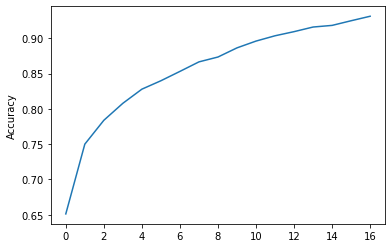

In [70]:
plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy')

print('Accuracy on the training data:')
print(model.evaluate(x_train, y_train)[1])

print('\nAccuracy on the test data:')
print(model.evaluate(x_test, y_test)[1])

In [206]:
#first 25 test photos:
test_sample = x_test[:25]
predictions = model.predict(test_sample)
true_labels = y_test[:25]

C:\Users\Miszel\AppData\Local\Temp\ipykernel_20528\3742274066.py:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  plt.title(text.format(net_claims * 100., it_is_really, ['is wrong', 'is right'][is_net_correct]))


(-0.5, 99.5, 99.5, -0.5)

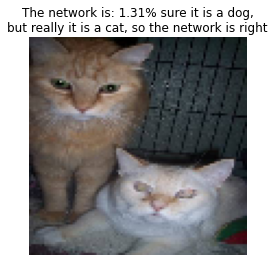

In [208]:
check_idx = 10
#predictions = model.predict(test_sample[check_idx].reshape(1,100,100,3))
plt.imshow(test_sample[check_idx] / 255)

text = 'The network is: {:.2f}% sure it is a dog,\nbut really it is a {}, so the network {}'
correct_response = true_labels[check_idx]
it_is_really = ['cat', 'dog'][correct_response]
net_claims = predictions[check_idx, 0]
is_net_correct = np.abs(net_claims - correct_response) < 0.5

plt.title(text.format(net_claims * 100., it_is_really, ['is wrong', 'is right'][is_net_correct]))
plt.axis('off')

In [248]:
from mpl_toolkits.axes_grid1 import ImageGrid
import random
test_sample = x_test
predictions = model.predict(test_sample)
true_labels = y_test

im_corr = []
im_corr_claim = []
im_incorr = []
im_incorr_claim = []
y = random.sample(range(1000), 100)
y = np.array(y)

In [249]:
for x in np.nditer(y):
    z = (test_sample[x]/255)
    correct_response = true_labels[x]
    it_is_really = ['cat', 'dog'][correct_response]
    img_array = img_to_array(z)
    net_claims = pd.to_numeric(predictions[x,0])
    if net_claims > 0.5 and it_is_really == 'cat':
        if len(im_incorr) > 5:
            pass
        else:
            im_incorr.append(z)
            im_incorr_claim.append(net_claims)
    elif net_claims > 0.5 and it_is_really == 'dog':
        if len(im_corr) > 5:
            pass
        else:
            im_corr.append(z)
            im_corr_claim.append(net_claims)
    elif net_claims <= 0.5 and it_is_really == 'cat':
        if len(im_corr) > 5:
            pass
        else:
            im_corr.append(z)
            im_corr_claim.append(net_claims)
    elif net_claims <= 0.5 and it_is_really == 'dog':
        if len(im_incorr) > 5:
            pass
        else:
            im_incorr.append(z)
            im_incorr_claim.append(net_claims)

print(len(im_corr))
print(len(im_incorr))
print(len(im_corr_claim))
print(len(im_incorr_claim))

6
6
6
6


Text(0.5, 1.0, '16.661%')

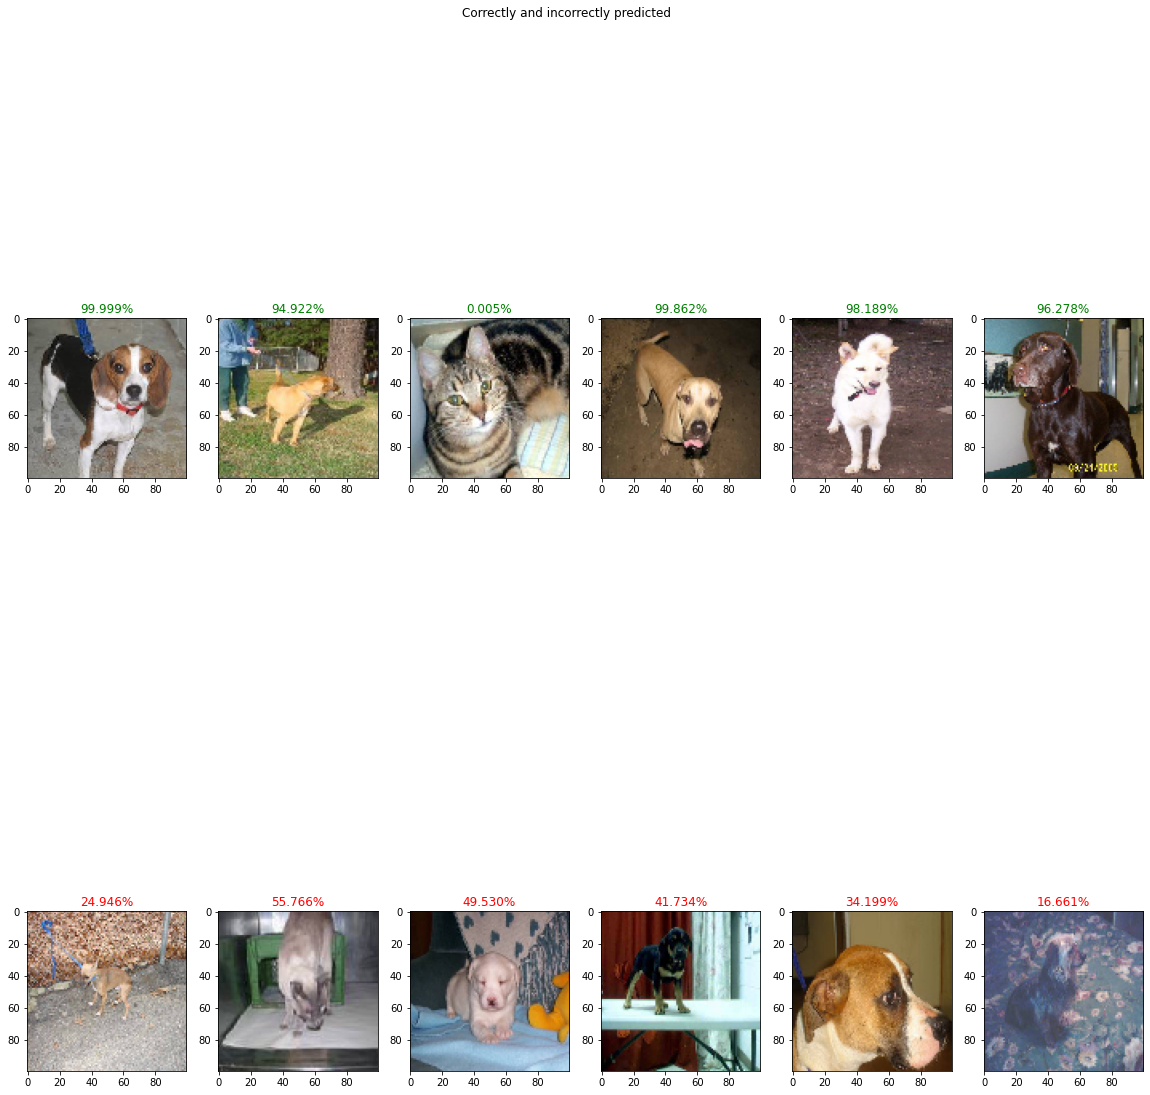

In [250]:
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(20, 20))
plt.suptitle("Correctly and incorrectly predicted")

ax[0, 0].imshow(im_corr[0]) 
ax[0, 0].set_title('{:.3f}%'.format(im_corr_claim[0] * 100), color = 'green')

ax[0, 1].imshow(im_corr[1]) 
ax[0, 1].set_title('{:.3f}%'.format(im_corr_claim[1] * 100), color = 'green')

ax[0, 2].imshow(im_corr[2]) 
ax[0, 2].set_title('{:.3f}%'.format(im_corr_claim[2] * 100), color = 'green')

ax[0, 3].imshow(im_corr[3]) 
ax[0, 3].set_title('{:.3f}%'.format(im_corr_claim[3] * 100), color = 'green')

ax[0, 4].imshow(im_corr[4]) 
ax[0, 4].set_title('{:.3f}%'.format(im_corr_claim[4] * 100), color = 'green')

ax[0, 5].imshow(im_corr[5]) 
ax[0, 5].set_title('{:.3f}%'.format(im_corr_claim[5] * 100), color = 'green')

ax[1, 0].imshow(im_incorr[0]) 
ax[1, 0].set_title('{:.3f}%'.format(im_incorr_claim[0] * 100), color = 'red')

ax[1, 1].imshow(im_incorr[1]) 
ax[1, 1].set_title('{:.3f}%'.format(im_incorr_claim[1] * 100), color = 'red')

ax[1, 2].imshow(im_incorr[2]) 
ax[1, 2].set_title('{:.3f}%'.format(im_incorr_claim[2] * 100), color = 'red')

ax[1, 3].imshow(im_incorr[3]) 
ax[1, 3].set_title('{:.3f}%'.format(im_incorr_claim[3] * 100), color = 'red')

ax[1, 4].imshow(im_incorr[4]) 
ax[1, 4].set_title('{:.3f}%'.format(im_incorr_claim[4] * 100), color = 'red')

ax[1, 5].imshow(im_incorr[5]) 
ax[1, 5].set_title('{:.3f}%'.format(im_incorr_claim[5] * 100), color = 'red')

In [112]:
img = load_img(r'C:\Users\Miszel\Desktop\ML_TEST\Rand.jpg', target_size=(100,100))

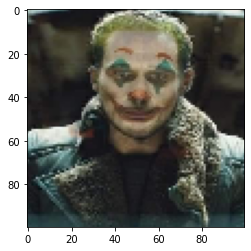

In [113]:
plt.imshow(img)

In [114]:
img_array = img_to_array(img)

In [115]:
model.predict(img_array.reshape(1,100,100,3))

array([[0.8468125]], dtype=float32)